In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import LabelBinarizer
import sklearn.preprocessing as prep
import sklearn.metrics as metrics

#Ucitavamo podatke.
df = pd.read_csv('./to_je_to.csv')

#Zbog memorijske slozenosti, morali smo da uzmemo uzorak od 12000 redova,
#jer ukoliko pustimo algoritam nad svim redovima, ne moze da radi.
df = df.sample(n=15000)

#izdvajamo bitne kolone:
bitne = df[['sat_minut', 'osvetljenje', 'stepen_povrede', 'postanski_broj_opstine']]
print(bitne.head())

       sat_minut  osvetljenje  stepen_povrede  postanski_broj_opstine
55280       1745            1               4                      34
60093        905            1               1                     108
16366       1912            3               1                     451
41255       1415            1               1                     686
3611        1830            1               1                      81


In [2]:
#Posto je osvetljenje kategoricki tip podatka, sa njim ne mozemo da radimo tako, nego mroamo da 
#ga binarizujemo.
lb = LabelBinarizer()
lb_osvetljenje = lb.fit_transform(bitne["osvetljenje"])

#U ovom delu koda, sve kolone koje ne treba da se binarizuju skaliramo na vrednost izmedju 0 i 1

scaler = prep.MinMaxScaler().fit(bitne[['sat_minut', 'postanski_broj_opstine']])
x = pd.DataFrame(scaler.transform(bitne[['sat_minut', 'postanski_broj_opstine']]))
x.columns = ["sat_minut", "postanski_broj_opstine"]

#Spajamo skalirane kolone sa binarizovanim Osvetljenjem (kolonom osvetljenje koja se 
#prosirila na 4 kolone)
tmp = pd.concat([pd.DataFrame(lb_osvetljenje, columns = lb.classes_), x], axis = 1)


#binarizujemo kolonu stepen povrede
lb2 = LabelBinarizer()
lb_stepen_povrede = lb2.fit_transform(bitne["stepen_povrede"])

#Pomocu pd.concat spajamo i stepen_povrede sa ostalim kolonama
n_df = pd.concat([pd.DataFrame(lb_stepen_povrede, columns = lb2.classes_), tmp], axis = 1)

#radi provere printamo prvih pet redova.
print(n_df.head())

   1  2  3  4  1  2  3  4  5  sat_minut  postanski_broj_opstine
0  0  0  0  1  1  0  0  0  0   0.739610                0.035909
1  1  0  0  0  1  0  0  0  0   0.383376                0.116431
2  1  0  0  0  0  0  1  0  0   0.810433                0.489663
3  1  0  0  0  1  0  0  0  0   0.599661                0.745375
4  1  0  0  0  1  0  0  0  0   0.775657                0.087051


link complete affinity manhattan n of clusters 3 silhouette 0.4210526472330778
link average affinity manhattan n of clusters 3 silhouette 0.4155763122772055
link single affinity manhattan n of clusters 3 silhouette 0.4350250042930751
link complete affinity euclidean n of clusters 3 silhouette 0.3935495705964992
link average affinity euclidean n of clusters 3 silhouette 0.35491428451018664
link single affinity euclidean n of clusters 3 silhouette 0.4350250042930751


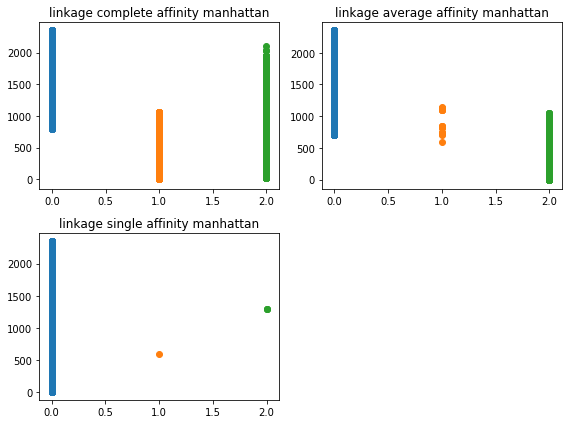

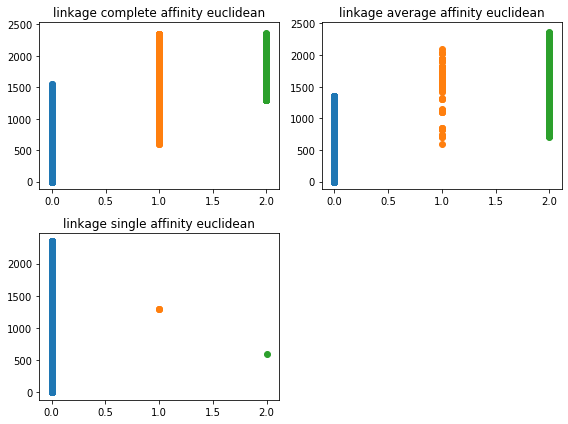

In [3]:
#Zbog lepseg iscrtavanja napravio sam dve petlje a ne petlju u petlji.
#iz nekog razloga kada je petlja u petlji, nece da iscrtava kako treba.

#algoritam AgglomerativeClustering prima tri parametra, broj klastera za koji smo stavili
#da uvek bude 3, linkage koji moze da bude ['complete', 'average', 'single']
#i affinity gde smo postavjlali manhattan i euclidean
#dakle, 6 puta je uradjen pomenuti algoritam, i svaki plt je uredno zapamcen,
#bice koriscen u PDF dokumentaciji.
plt_ind=1
fig = plt.figure(figsize=(8,6))
for link in ['complete', 'average', 'single']:
    est = AgglomerativeClustering(n_clusters=3, linkage= link, affinity= 'manhattan')
    est.fit(x)
    df['labels'] = est.labels_
    print('link', link, 'affinity', 'manhattan', 'n of clusters', 3, 'silhouette', silhouette_score(x, est.labels_))
    sp =fig.add_subplot(2,2,plt_ind)
    for j in range(0, 3):
        cluster = df.loc[df['labels'] == j]
        plt.scatter(cluster['labels'], cluster['sat_minut'])
    plt.title('linkage' + ' ' + link + ' ' + 'affinity' + ' ' + 'manhattan')
    plt.tight_layout()
    fig.savefig(link + 'manhattan'+".png")
    plt_ind+=1


plt_ind=1
fig = plt.figure(figsize=(8,6))
for link in ['complete', 'average', 'single']:
    est = AgglomerativeClustering(n_clusters=3, linkage= link, affinity= 'euclidean')
    est.fit(x)
    df['labels'] = est.labels_
    print('link', link, 'affinity', 'euclidean', 'n of clusters', 3, 'silhouette', silhouette_score(x, est.labels_))
    sp =fig.add_subplot(2,2,plt_ind)
    for j in range(0, 3):
        cluster = df.loc[df['labels'] == j]
        plt.scatter(cluster['labels'], cluster['sat_minut'])
    plt.title('linkage' + ' ' + link + ' ' + 'affinity' + ' ' + 'euclidean')
    plt.tight_layout()
    fig.savefig(link + 'euclidean'+".png")
    plt_ind+=1
